# Stryde Training - first-look data analysis for continuouse recordings

This notebook contains basic data visualization and analysis of the data collected with Stryde nodes at KAUST during the training week of Sept 24-28 2023.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pylops
import matplotlib.pyplot as plt

from matplotlib.colors import SymLogNorm
from pylops.signalprocessing import FFT2D

from pystryde.reader import *
from pystryde.preproc import *
from pystryde.cmap import cmaps
from pystryde.visual import *

## Single-receiver Continous record

2023-09-26 06:00:00 2023-09-26 10:59:00
2023-09-26 07:00:00 2023-09-26 10:59:00


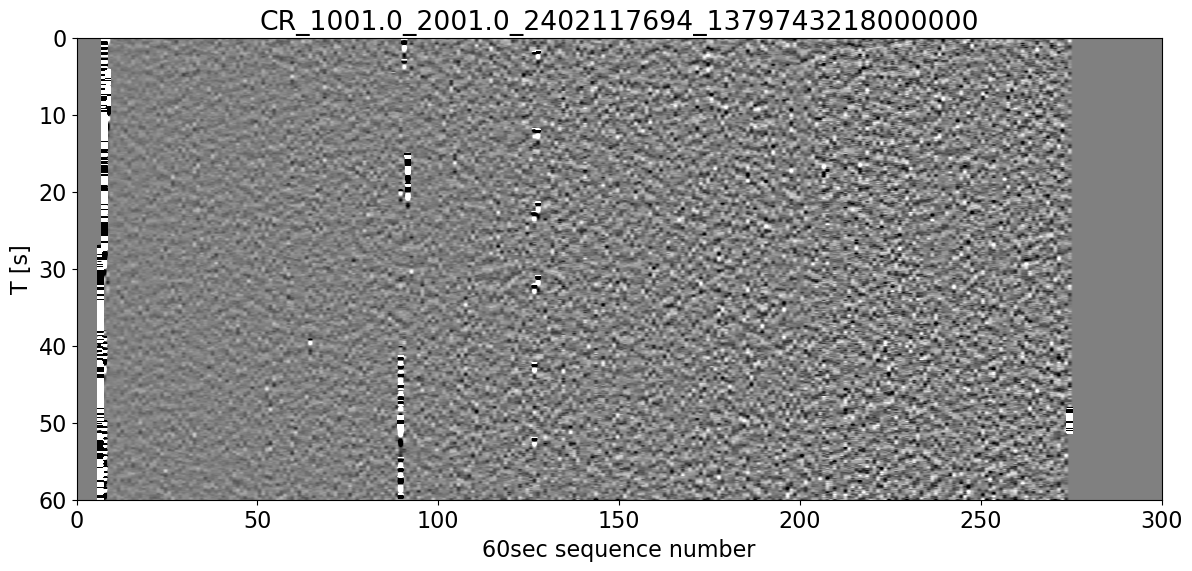

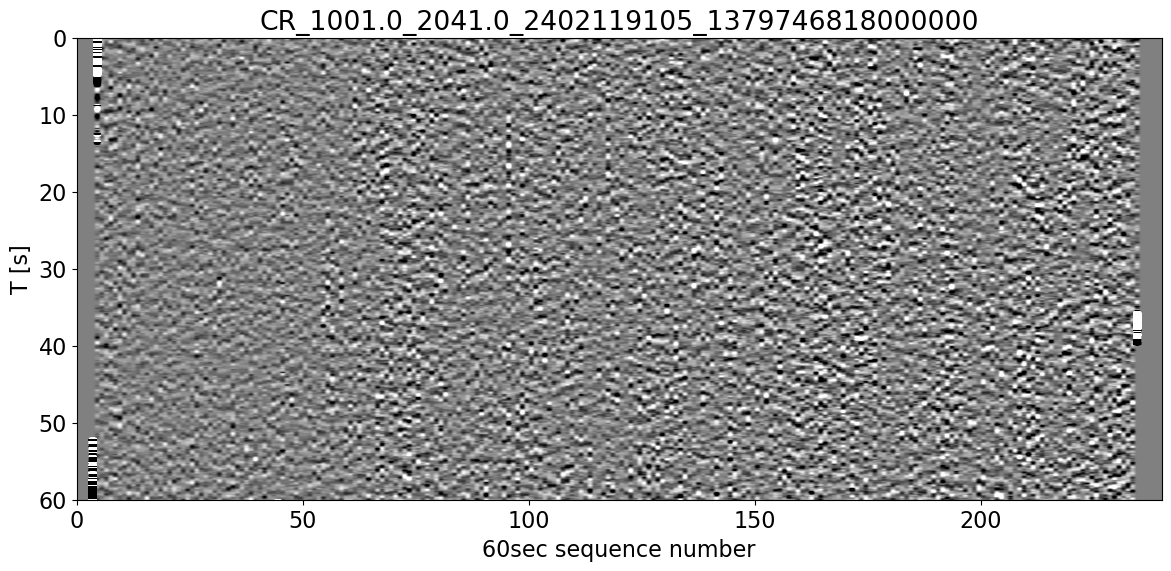

In [2]:
# Early deployment
f = strydecont('/mnt/datawaha_dig/Data/STRYDE/StrydeTraining_26_09_2023/ContinousRecords/CR_1001.0_2001.0_2402117694_1379743218000000.segy')
f.interpret()
f.getrecord()
print(f.utctime[0], f.utctime[-1])
f.plotrecord(figsize=(14, 6), title='CR_1001.0_2001.0_2402117694_1379743218000000', clip=1e-3);

# Later deployment (starts from later time if not deployed at the end of the first h)
f = strydecont('/mnt/datawaha_dig/Data/STRYDE/StrydeTraining_26_09_2023/ContinousRecords/CR_1001.0_2041.0_2402119105_1379746818000000.segy')
f.interpret()
f.getrecord()
print(f.utctime[0], f.utctime[-1])
f.plotrecord(figsize=(14, 6), title='CR_1001.0_2041.0_2402119105_1379746818000000', clip=1e-3);

## Entire data Continous record

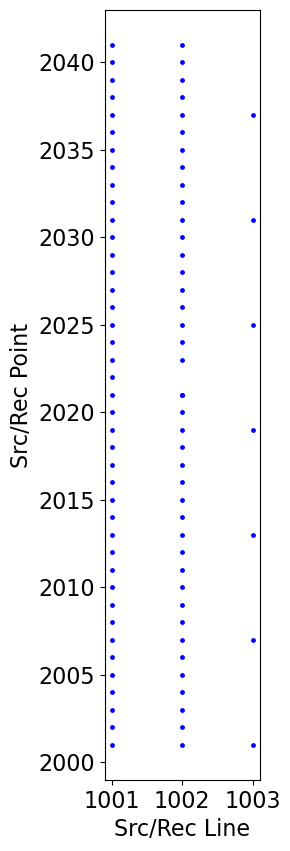

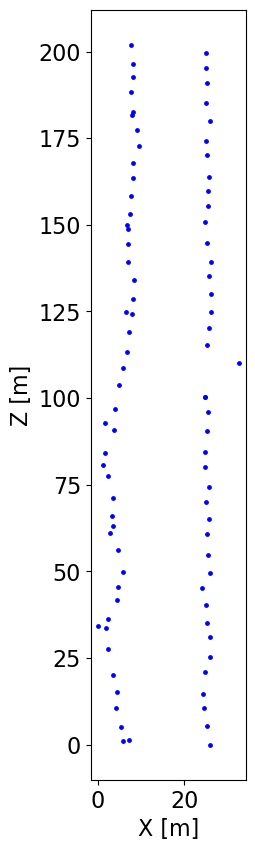

In [3]:
f = strydeconts('/mnt/datawaha_dig/Data/STRYDE/StrydeTraining_26_09_2023/ContinousRecords/')
f.interpret()
f.plotgeom(coords=False, figsize=(2, 10))
f.plotgeom(local=True, figsize=(2, 10))

# extract records in a choosen time window
f.getrecords(utctime_start=datetime.datetime(2023, 9, 26, 7, 0), utctime_end=datetime.datetime(2023, 9, 26, 10, 59))

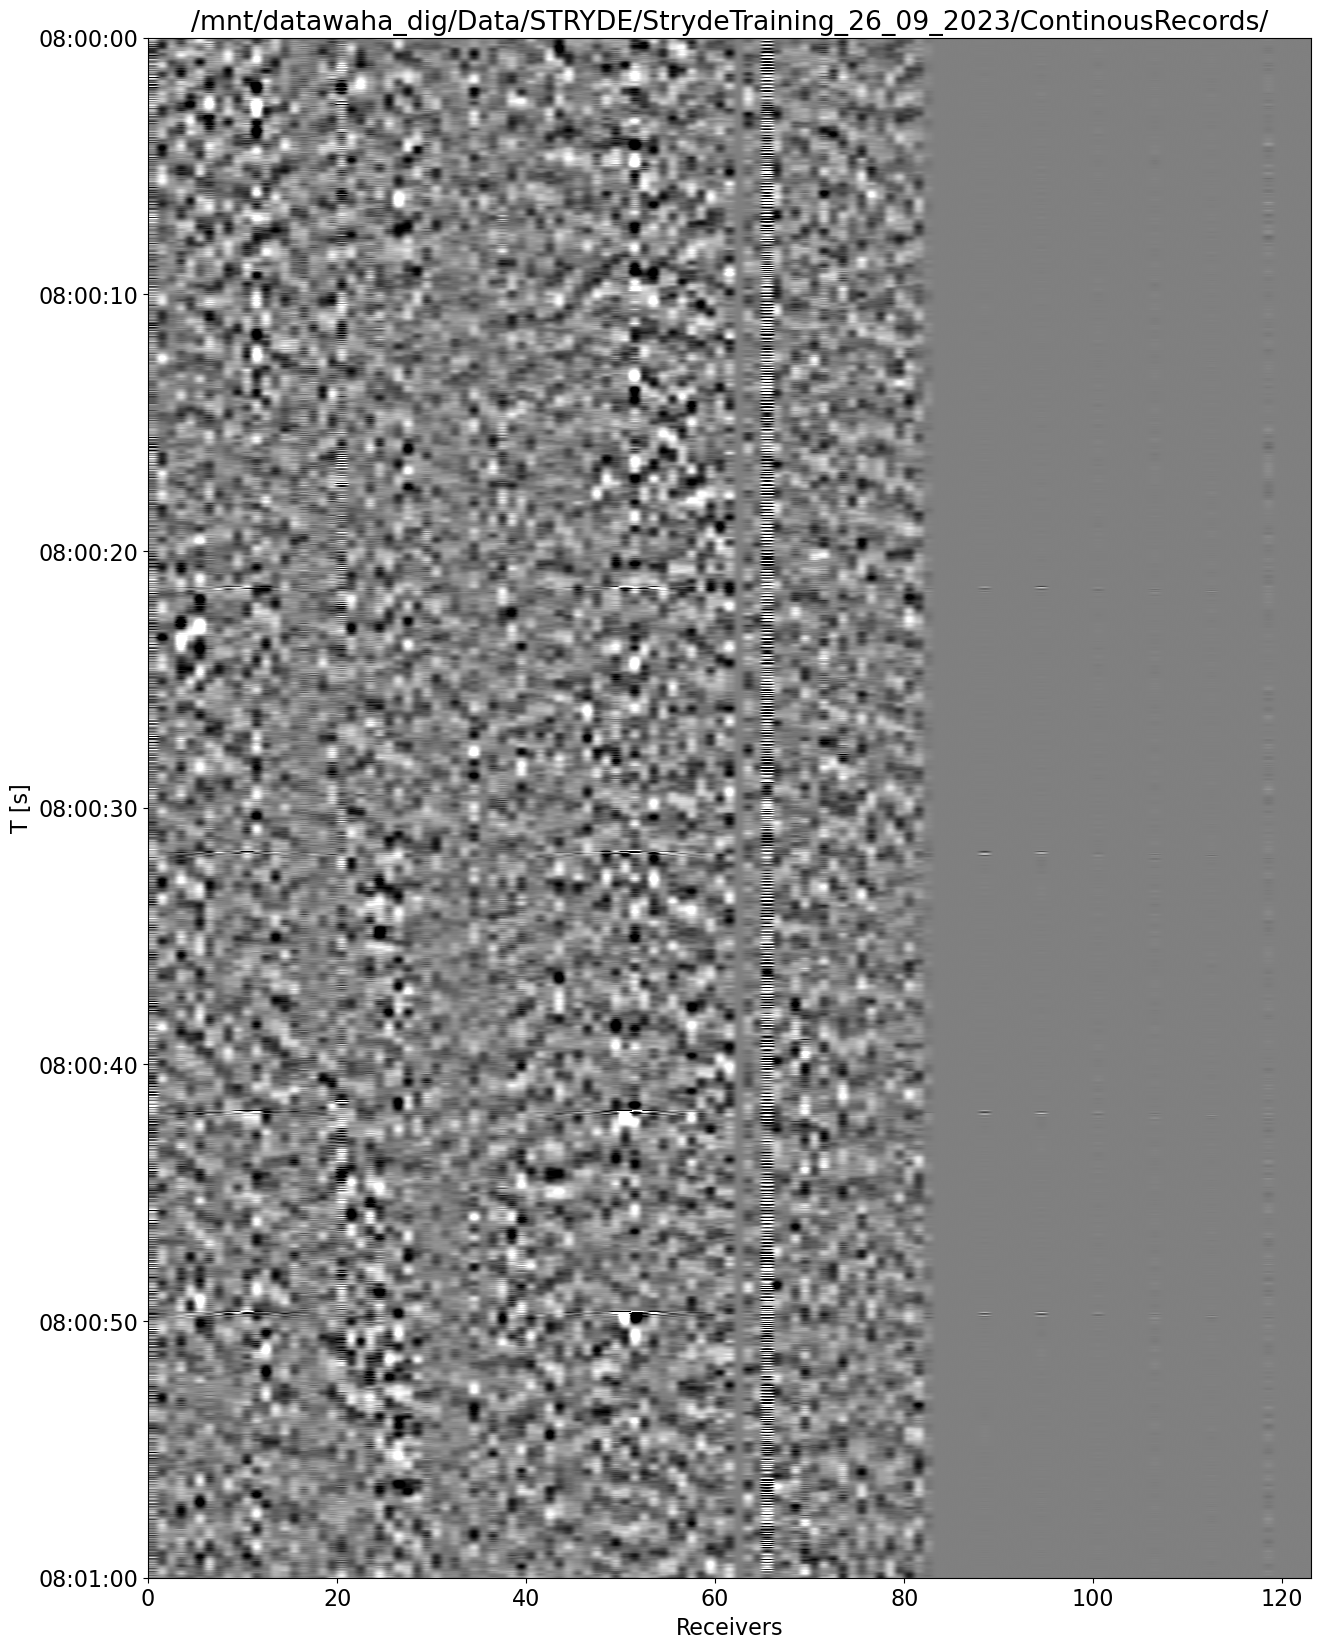

In [4]:
# display continous recording for a given time window multiple of 60sec
f.plotrecord(utctime_start=datetime.datetime(2023, 9, 26, 8, 0), 
             utctime_end=datetime.datetime(2023, 9, 26, 8, 1), clip=0.001, cmap='gray', figsize=(15, 20));

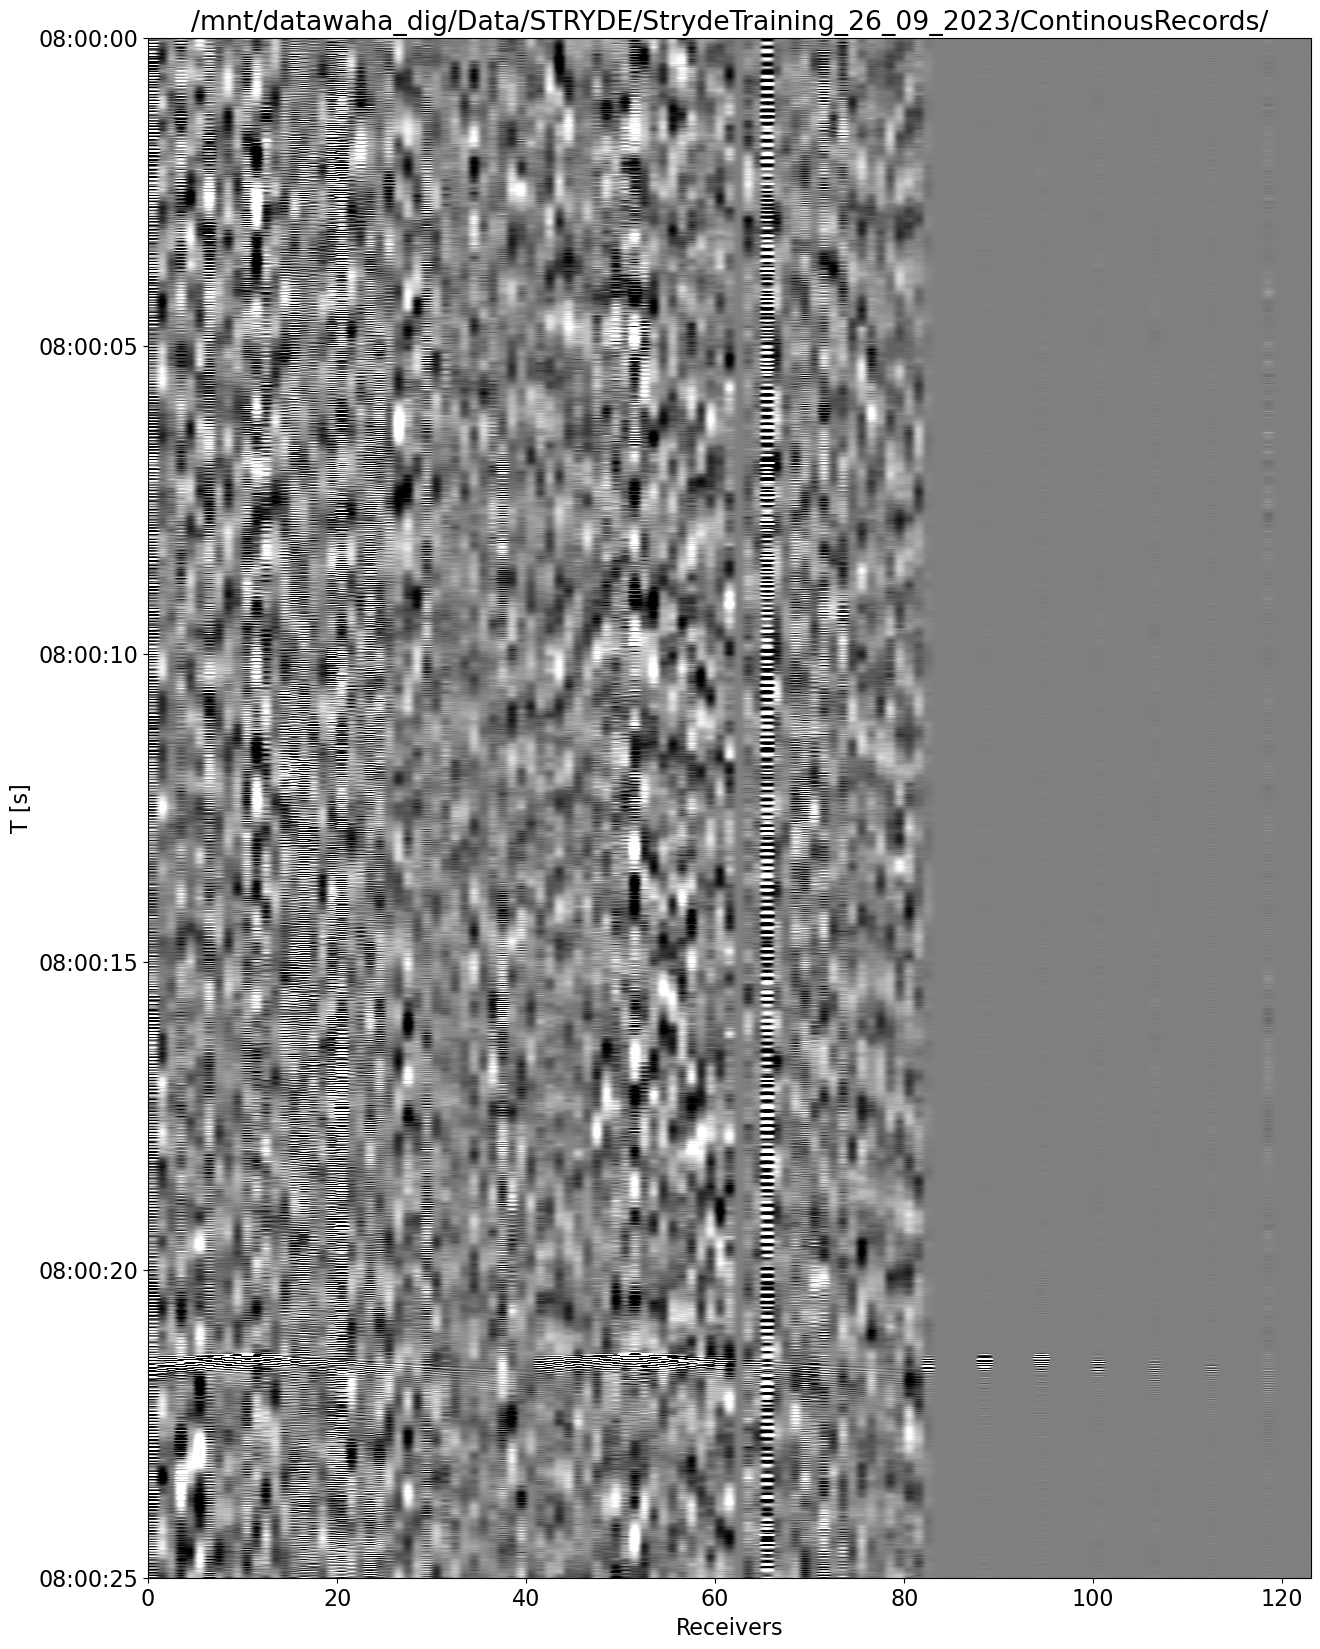

In [5]:
# display continous recording for a given time window (choosing to reduce the end time in terms of samples displayed)
f.plotrecord(utctime_start=datetime.datetime(2023, 9, 26, 8, 0), utctime_end=datetime.datetime(2023, 9, 26, 8, 1),
             nsamples = int(25/f.dt), clip=0.001, cmap='gray', figsize=(15, 20));

(19626.333622685186, 19626.333564814813)

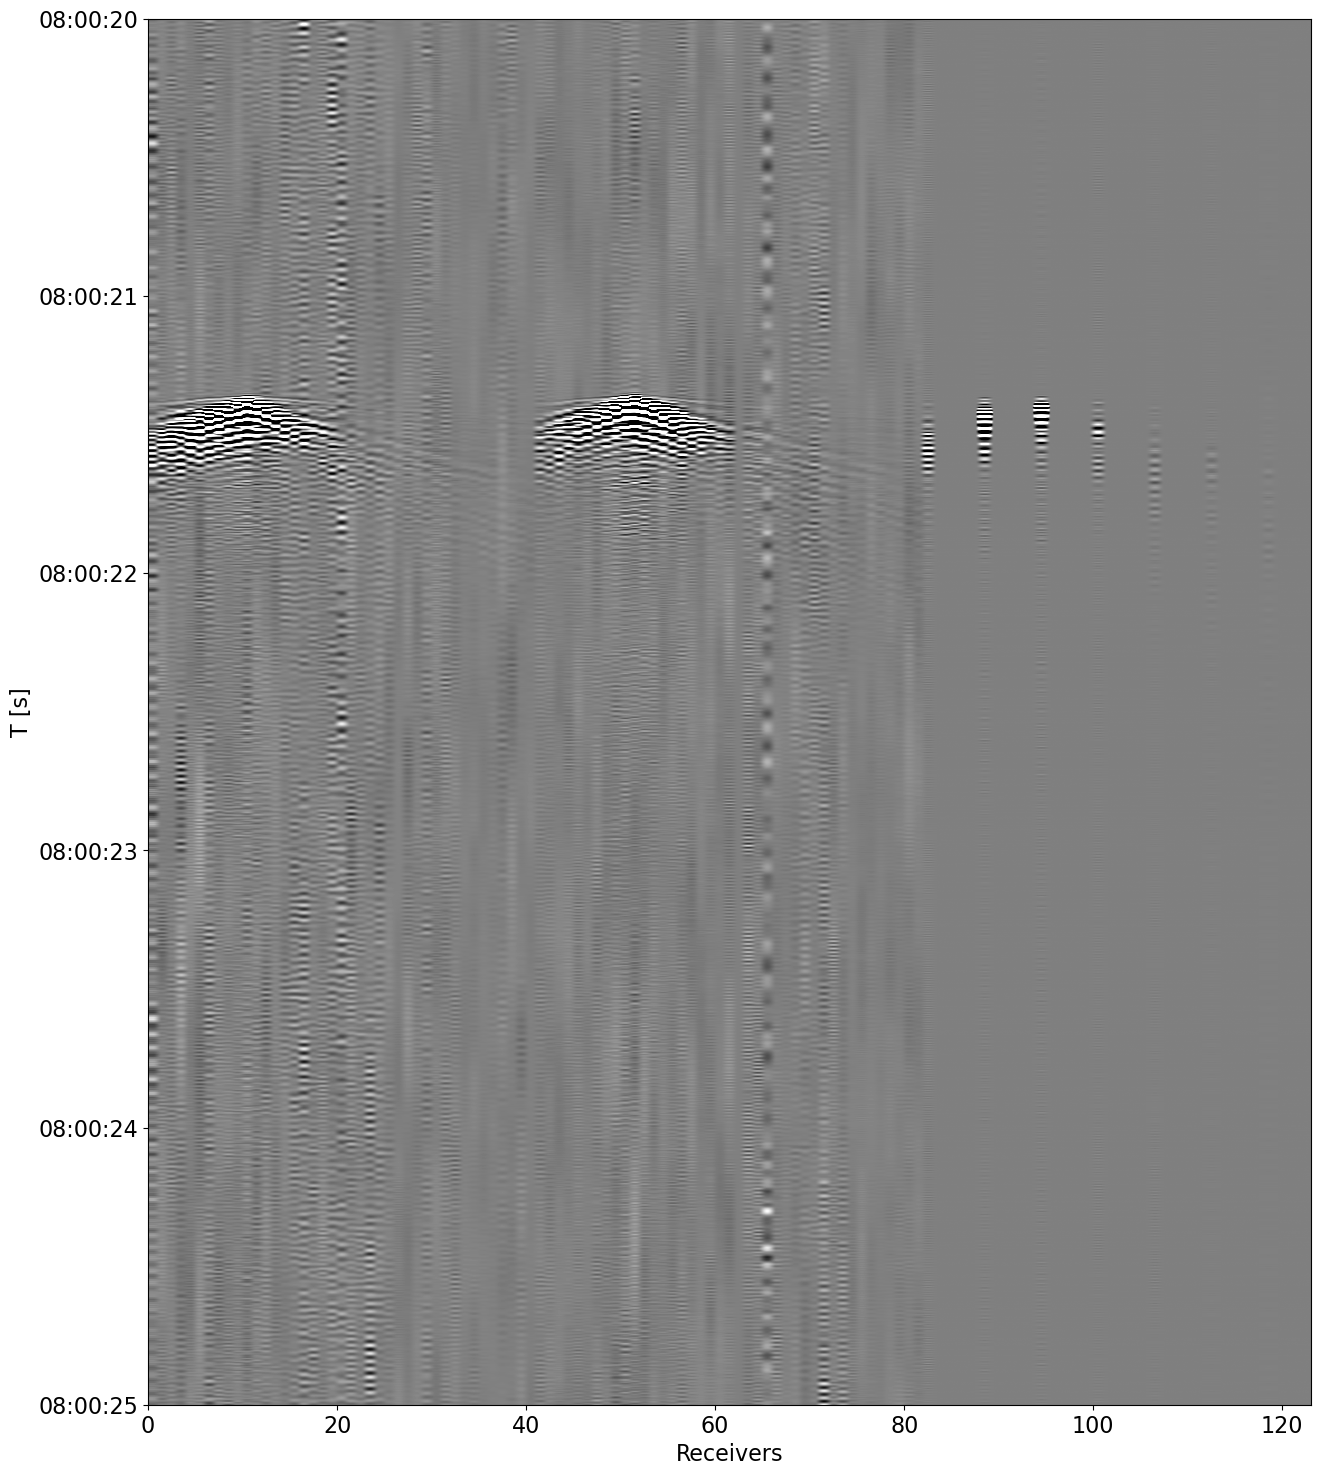

In [6]:
# extact small portion of data near an active shot and display it
data, tlims = f.extract(utctime_start=datetime.datetime(2023, 9, 26, 8, 0), utctime_end=datetime.datetime(2023, 9, 26, 8, 1),
                        nsamples = int(25/f.dt))

fig, ax = plt.subplots(1, 1, figsize=(15, 18))
ax.imshow(data, cmap='gray', vmin=-0.01, vmax=0.01, extent=(0, f.nrecs, tlims[-1], tlims[0]))
ax.axis('tight')
ax.set_xlabel('Receivers')
ax.set_ylabel('T [s]')
ax.set_ylim([ tlims[-1], datetime.datetime(2023, 9, 26, 8, 0, 20)])

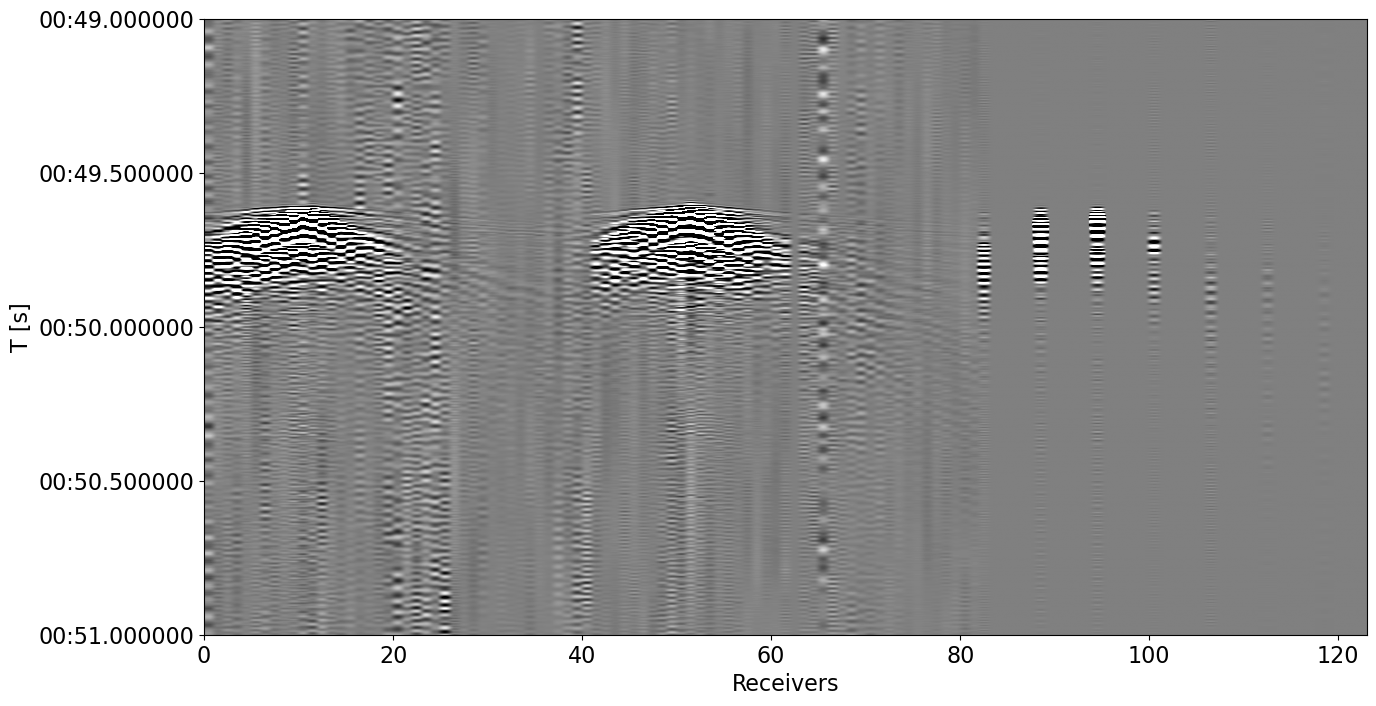

In [7]:
# and another one later on
data, tlims = f.extract(utctime_start=datetime.datetime(2023, 9, 26, 8, 0), utctime_end=datetime.datetime(2023, 9, 26, 8, 1))

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.imshow(data, cmap='gray', vmin=-0.01, vmax=0.01, extent=(0, f.nrecs, tlims[-1], tlims[0]))
ax.axis('tight')
ax.set_xlabel('Receivers')
ax.set_ylabel('T [s]')
ax.set_ylim([datetime.datetime(2023, 9, 26, 8, 0, 51), datetime.datetime(2023, 9, 26, 8, 0, 49)]);